In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

%cd '/content/gdrive/MyDrive/LDS0_k282_Online_NguyenHoangThien/Project_1'

Mounted at /content/gdrive
/content/gdrive/MyDrive/LDS0_k282_Online_NguyenHoangThien/Project_1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
df = pd.read_csv('Data/final_df.csv')

In [3]:
df.head()

,product_id,category,sub_category,user,rating,comment
0,0,Thời Trang Nữ,"Áo khoác, Áo choàng & Vest",q*****3,5,đẹp tốt
1,0,Thời Trang Nữ,"Áo khoác, Áo choàng & Vest",0*****y,5,đẹp tốt
2,0,Thời Trang Nữ,"Áo khoác, Áo choàng & Vest",minhanhnguyen807,5,đẹp tốt
3,0,Thời Trang Nữ,"Áo khoác, Áo choàng & Vest",kimngnnguyn183,5,đẹp tốt
4,0,Thời Trang Nữ,"Áo khoác, Áo choàng & Vest",.*****0,5,đẹp tốt


In [4]:
df.shape

(195909, 6)

In [5]:
df.rating.value_counts()

5    65616
3    35089
4    34602
1    32847
2    27755
Name: rating, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195909 entries, 0 to 195908
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   product_id    195909 non-null  int64 
 1   category      195909 non-null  object
 2   sub_category  195909 non-null  object
 3   user          195909 non-null  object
 4   rating        195909 non-null  int64 
 5   comment       187515 non-null  object
dtypes: int64(2), object(4)
memory usage: 9.0+ MB


In [7]:
df = df.reset_index()
df.head()

,index,product_id,category,sub_category,user,rating,comment
0,0,0,Thời Trang Nữ,"Áo khoác, Áo choàng & Vest",q*****3,5,đẹp tốt
1,1,0,Thời Trang Nữ,"Áo khoác, Áo choàng & Vest",0*****y,5,đẹp tốt
2,2,0,Thời Trang Nữ,"Áo khoác, Áo choàng & Vest",minhanhnguyen807,5,đẹp tốt
3,3,0,Thời Trang Nữ,"Áo khoác, Áo choàng & Vest",kimngnnguyn183,5,đẹp tốt
4,4,0,Thời Trang Nữ,"Áo khoác, Áo choàng & Vest",.*****0,5,đẹp tốt


In [8]:
df.tail()

,index,product_id,category,sub_category,user,rating,comment
195904,195904,998,Thời Trang Nữ,Vớ/ Tất,mkdlr35c7s,4,mỏng tuột
195905,195905,999,Thời Trang Nữ,Vớ/ Tất,f470w50uzq,2,mỏng ổn shopee hủy
195906,195906,999,Thời Trang Nữ,Vớ/ Tất,trang.xu,2,giian mềm nhẹ
195907,195907,999,Thời Trang Nữ,Vớ/ Tất,Người dùng Shopee,2,mỏng_dính xét kĩ
195908,195908,999,Thời Trang Nữ,Vớ/ Tất,d*****4,1,tất mỏng


In [9]:
# feature engineering: create output feature
df['output'] = 0
df.output = df.rating.apply(lambda x: 'dislike' if (x==1 or x==2) else ('neutral' if x==3 else 'like'))

In [10]:
data = df.loc[:, ['comment', 'output']]

In [11]:
data.comment.isna().sum()

8394

In [12]:
data.dropna(inplace=True, axis=0, subset=['comment'])

In [13]:
data.head()

,comment,output
0,đẹp tốt,like
1,đẹp tốt,like
2,đẹp tốt,like
3,đẹp tốt,like
4,đẹp tốt,like


In [14]:
data.shape

(187515, 2)

## Word Cloud

In [15]:
def word_cloud(df, class_):
    df_ = df[df.output == class_]['comment']
    
    from wordcloud import WordCloud
    wc = WordCloud(
        background_color = 'white',
        max_words = 200,
        width = 1600, height = 800,
        max_font_size = 200
    )
    
    # generate a word could from data
    str_of_words = " ".join(df_.values.tolist())
    wc.generate(str_of_words)
    
    # create DF from wc
    df_wc = pd.DataFrame(list(wc.words_.items()),columns = ['words', 'freq'])
    
    # plot wordcloud
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize = (10, 12))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.title(f"Comment from {class_}", fontsize = 15)
    plt.axis('off')
    
    # plot bar chart
    plt.figure(figsize = (10, 12))
    plt.barh(df_wc.iloc[:20, 0], df_wc.iloc[:20, 1])
    plt.title(f"Top 20 most frequent words of class {class_}", fontsize = 15)
    plt.yticks(fontsize = 12)
    
    plt.show()
    return df_wc

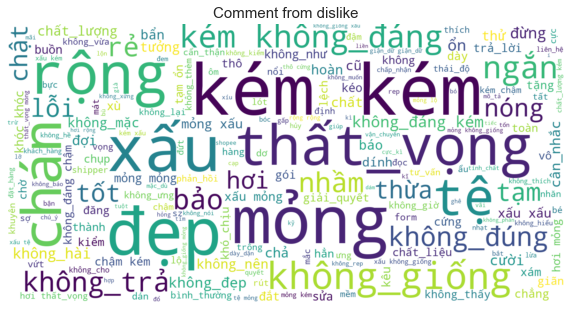

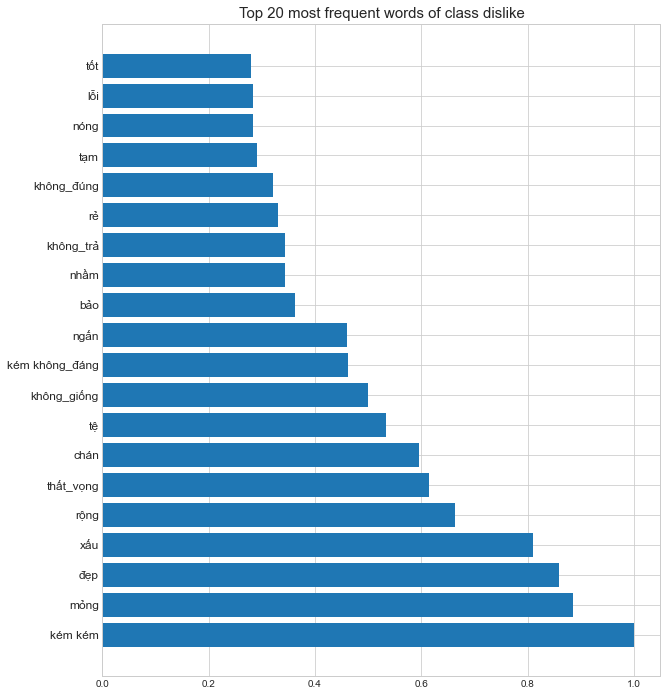

In [16]:
dislike_df = word_cloud(data, class_ = 'dislike')

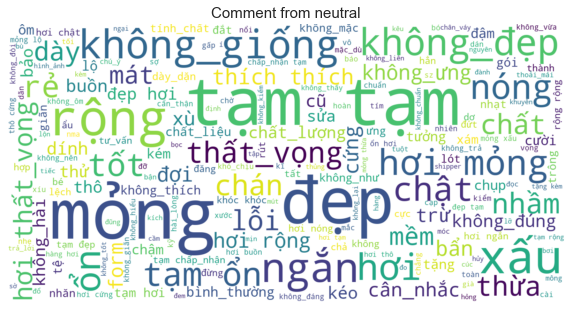

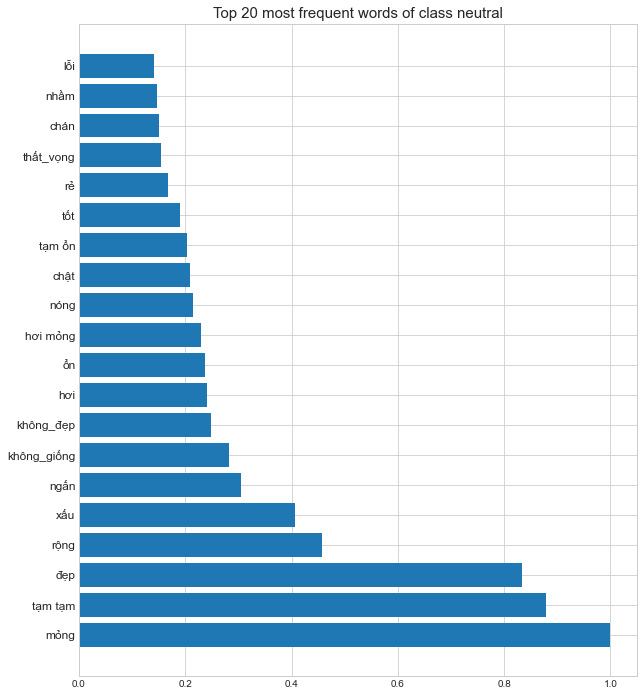

In [17]:
neutral_df = word_cloud(data, class_='neutral')

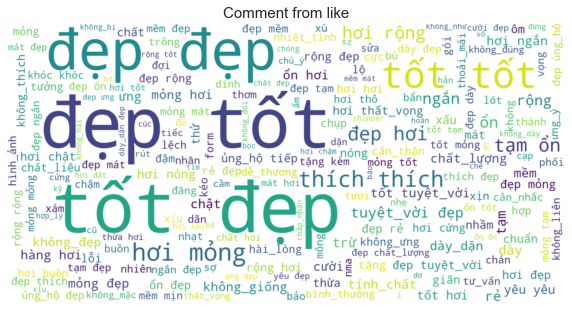

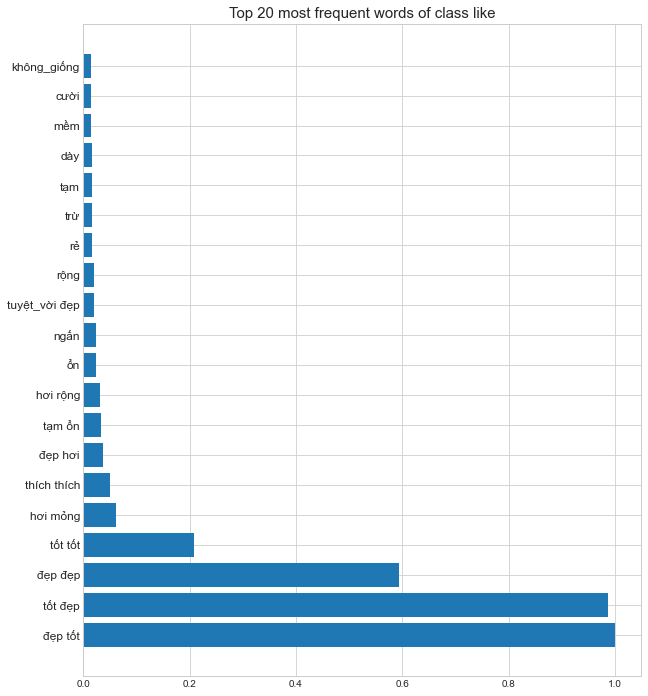

In [18]:
like_df = word_cloud(data, class_ = 'like')

In [ ]:
# check for the word "đẹp" in dislike comment
dislike_cmt = data.loc[data.output == 'dislike','comment']
dislike_cmt[dislike_cmt.str.contains('đẹp', regex=True)]

52424                                 sản_phẩm đóng_gói đẹp
56020                                 sản_phẩm đóng_gói đẹp
74441                   không_giống đẹp gửi nâu đậm mặc già
74777                                           đẹp lắm mặc
75010           đắt đắt sản_phẩm dày đẹp ảo shop rẻ mặc tạm
                                ...                        
229468             kẹp bảo đổi đồng_ý đổi gửi nơ cắt rẻ đẹp
229483                                                  đẹp
229498                          đẹp nma shop shop không_trả
229525                                             đẹp rách
229541    thất_vọng shop mặc đậm cũ hẳn cũ đẹp đậm xấu m...
Name: comment, Length: 4481, dtype: object

In [ ]:
dislike_cmt = data.loc[data.output == 'dislike','comment']
neutral_cmt = data.loc[data.output == 'neutral','comment']
dislike_cmt = dislike_cmt.str.replace('đẹp', '')
neutral_cmt = neutral_cmt.str.replace('đẹp', '')

In [19]:
# remove "đẹp" from class "dislike" and "neutral"
remove_data = data.copy()

# remove_data.loc[remove_data.output == 'dislike','comment'] = dislike_cmt
# remove_data.loc[remove_data.output == 'neutral','comment'] = neutral_cmt

In [20]:
remove_data.shape

(187515, 2)

### check whether "đẹp" has been removed from class "dislike" and "neutral"

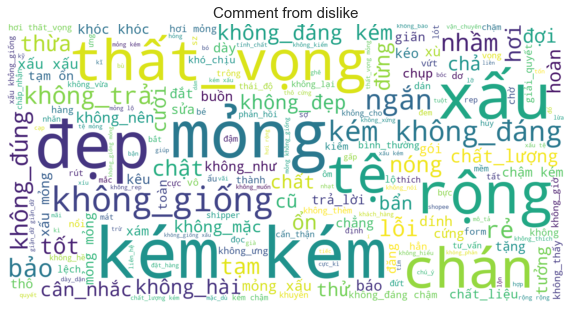

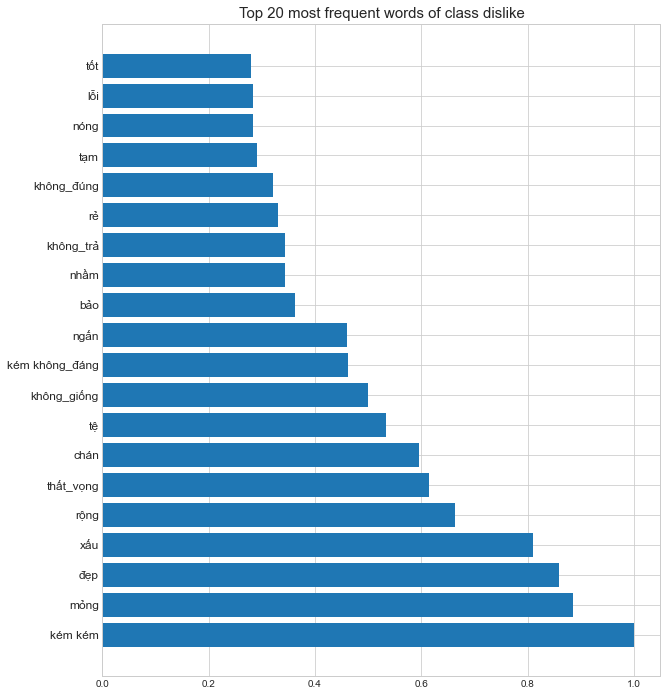

,words,freq
0,kém kém,1.000000
1,mỏng,0.885566
2,đẹp,0.859689
3,xấu,0.809661
4,rộng,0.663600
...,...,...
195,hơi rộng,0.052329
196,không_giống mỏng,0.052329
197,liền,0.051754
198,không_phản,0.051466


In [21]:
word_cloud(remove_data, class_='dislike')

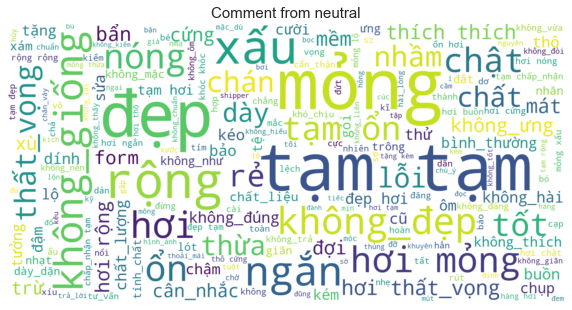

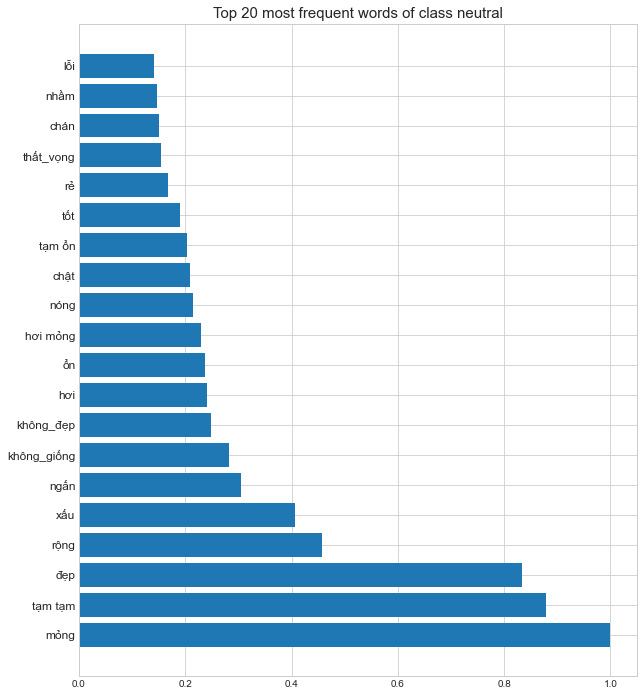

,words,freq
0,mỏng,1.000000
1,tạm tạm,0.877958
2,đẹp,0.832877
3,rộng,0.457534
4,xấu,0.406725
...,...,...
195,bơi,0.020922
196,đũng,0.020922
197,cúc,0.020672
198,không_kiểm,0.020672


In [22]:
word_cloud(remove_data, class_='neutral')

# Preprocessing

## TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features = 100)

tv_transform = tv.fit_transform(remove_data['comment'])

tv_df = pd.DataFrame(tv_transform.toarray(), 
                     columns = tv.get_feature_names()).add_prefix('TF-IDF')

In [24]:
tv_df.shape

(187515, 100)

In [25]:
data1 = pd.concat([remove_data, tv_df], axis=1, sort=False, join='inner')

In [26]:
data1.shape

(179496, 102)

In [27]:
data2 = data1.drop(['comment'], axis=1)

In [28]:
# output encoding
data2.output = data2.output.apply(lambda x: 0 if x=='dislike' else (1 if x=='neutral' else 2))

## Handle imbalanced class

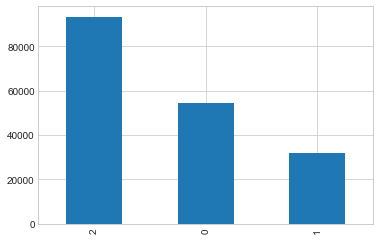

In [29]:
data2.output.value_counts().plot.bar()
plt.show();

In [30]:
like_df = data2[data2.output == 2]
dislike_df = data2[data2.output == 1]
neutral_df = data2[data2.output == 0]
display(like_df.shape, dislike_df.shape, neutral_df.shape)

(93379, 101)

(31915, 101)

(54202, 101)

perform oversampling for class "dislike" and undersampling for class "like"

In [31]:
from sklearn.utils import resample
dislike_oversample = resample(dislike_df,
                         replace = True,
                         n_samples = neutral_df.shape[0],
                         random_state = 27)
like_undersample = resample(like_df,
                         replace = True,
                         n_samples = neutral_df.shape[0],
                         random_state = 27)
balanced_sample = pd.concat([neutral_df, dislike_oversample, like_undersample], axis=0)

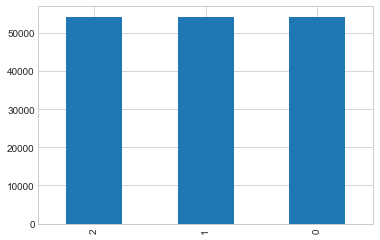

In [32]:
balanced_sample.output.value_counts().plot.bar()
plt.show();

In [33]:
balanced_sample.shape

(162606, 101)

# modeling

In [34]:
balanced_sample.shape

(162606, 101)

In [35]:
# check for nulls before modeling
balanced_sample.isna().sum().sum()

0

In [36]:
x = balanced_sample.iloc[:, 1:]
y = balanced_sample.iloc[:, 0]
display(f'x_shape: {x.shape}, y_shape: {y.shape}')

'x_shape: (162606, 100), y_shape: (162606,)'

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
display(f"x_train's shape: {x_train.shape}; x_test's shape: {x_test.shape}")

"x_train's shape: (130084, 100); x_test's shape: (32522, 100)"

In [38]:
# run cross validation with k-fold = 10
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
import time

# Liệt kê các model sử dụng
models = [LogisticRegression(), MultinomialNB(), KNeighborsClassifier(n_neighbors=11), 
          DecisionTreeClassifier(), RandomForestClassifier()]
scores = []
train_times = []
names = []

# Duyệt qua các model
    # Thực hiện cross_val_score (k-fold) với mỗi model (cv=10)
    # Thêm số liệu cho socres, train_times, names
for model in models:
    start = time.time()
    scores.append(cross_val_score(model, x_train, y_train, scoring='accuracy', cv=10).mean())
    end = time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)

# Tạo DataFrame gồm 3 cột scores, train_times, names
df = pd.DataFrame(scores, columns=['Score'], index=range(len(models)))
df.insert(1, 'Time', pd.Series(train_times))
df.insert(0, 'Mode', pd.Series(names))
print(df)

                     Mode     Score        Time
0      LogisticRegression  0.484987   68.470988
1           MultinomialNB  0.465538    1.261238
2    KNeighborsClassifier  0.484480  369.235942
3  DecisionTreeClassifier  0.534386  107.655933
4  RandomForestClassifier  0.544164  737.154537


Conclusion: classifying data into 3 classes isn't the best idea as the most effective model's score is considerably low (accuarcy = 54% from Random Forest) => Try classify the data set into 2 classes "dislike" and "like" to test if it conveys better performance.

---
# Modeling with 2 classes - "dislike" & "like"

In [39]:
data2.head()

,output,TF-IDFbuồn,TF-IDFbáo,TF-IDFbình_thường,TF-IDFbảo,TF-IDFbẩn,TF-IDFchán,TF-IDFchả,TF-IDFchấp_nhận,TF-IDFchất,...,TF-IDFôm,TF-IDFđăng,TF-IDFđậm,TF-IDFđắt,TF-IDFđẹp,TF-IDFđợi,TF-IDFđừng,TF-IDFưng,TF-IDFổn,TF-IDFủng_hộ
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.63394,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.63394,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.63394,0.0,0.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.63394,0.0,0.0,0.0,0.0,0.0
4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.63394,0.0,0.0,0.0,0.0,0.0


In [40]:
new_data = data1.copy(deep=True)

new_data.output = new_data.output.apply(lambda x: 0 if (x=='dislike' or x=='neutral') else 1)

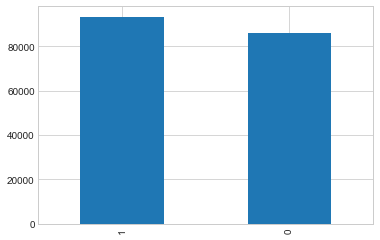

In [41]:
new_data.output.value_counts().plot.bar()
plt.show();
# the data is balanced

In [42]:
new_data.shape

(179496, 102)

In [43]:
new_data.head()

,comment,output,TF-IDFbuồn,TF-IDFbáo,TF-IDFbình_thường,TF-IDFbảo,TF-IDFbẩn,TF-IDFchán,TF-IDFchả,TF-IDFchấp_nhận,...,TF-IDFôm,TF-IDFđăng,TF-IDFđậm,TF-IDFđắt,TF-IDFđẹp,TF-IDFđợi,TF-IDFđừng,TF-IDFưng,TF-IDFổn,TF-IDFủng_hộ
0,đẹp tốt,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.63394,0.0,0.0,0.0,0.0,0.0
1,đẹp tốt,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.63394,0.0,0.0,0.0,0.0,0.0
2,đẹp tốt,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.63394,0.0,0.0,0.0,0.0,0.0
3,đẹp tốt,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.63394,0.0,0.0,0.0,0.0,0.0
4,đẹp tốt,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.63394,0.0,0.0,0.0,0.0,0.0


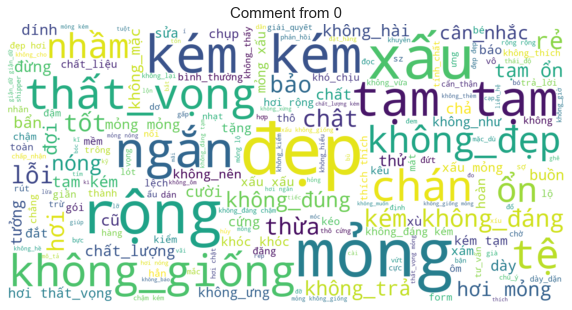

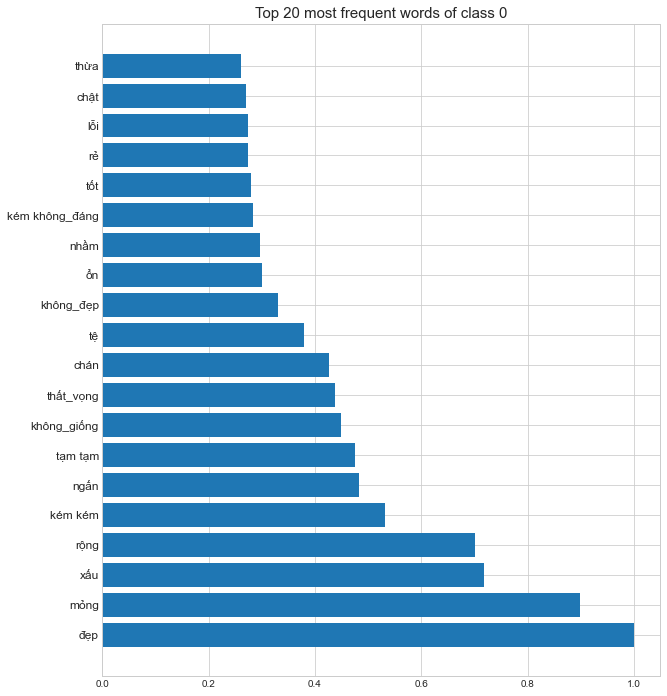

,words,freq
0,đẹp,1.000000
1,mỏng,0.898910
2,xấu,0.718903
3,rộng,0.700676
4,kém kém,0.530815
...,...,...
195,thích,0.045472
196,không_báo,0.045096
197,kì,0.044908
198,không_xứng,0.044720


In [44]:
# dislike class
word_cloud(new_data, class_= 0)

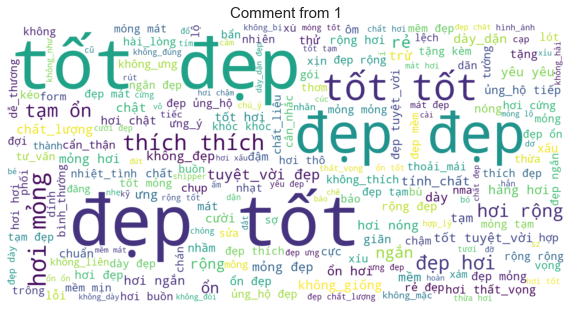

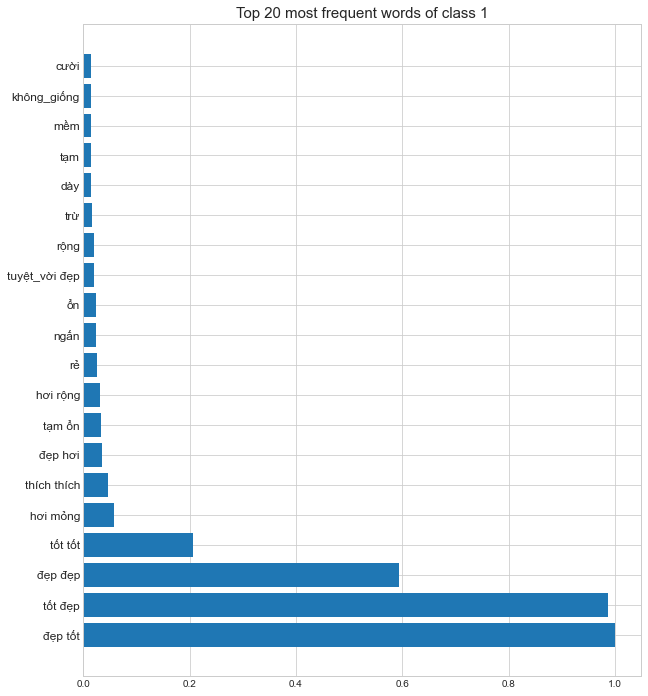

,words,freq
0,đẹp tốt,1.000000
1,tốt đẹp,0.987065
2,đẹp đẹp,0.593045
3,tốt tốt,0.206662
4,hơi mỏng,0.057004
...,...,...
195,chất đẹp,0.003250
196,mỏng lộ,0.003250
197,chê,0.003217
198,đỡ,0.003217


In [45]:
# like class
word_cloud(new_data, class_= 1)

In [47]:
new_data.to_csv('Data/two_class_data.csv', index=False)

In [48]:
new_data.drop(['comment'], axis=1, inplace=True)

In [49]:
x = new_data.iloc[:, 1:]
y = new_data.iloc[:, 0]
display(f'x_shape: {x.shape}, y_shape: {y.shape}')

'x_shape: (179496, 100), y_shape: (179496,)'

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
display(f"x_train's shape: {x_train.shape}; x_test's shape: {x_test.shape}")

"x_train's shape: (143596, 100); x_test's shape: (35900, 100)"

In [51]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
model = clf.fit(x_train, y_train)

In [52]:
model.score(x_test, y_test)

0.6846796657381615

In [53]:
# run cross validation with k-fold = 10
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
import time

# Liệt kê các model sử dụng
models = [LogisticRegression(), MultinomialNB(), KNeighborsClassifier(n_neighbors=11), 
          DecisionTreeClassifier(), RandomForestClassifier()]
scores = []
train_times = []
names = []

# Duyệt qua các model
    # Thực hiện cross_val_score (k-fold) với mỗi model (cv=10)
    # Thêm số liệu cho socres, train_times, names
for model in models:
    start = time.time()
    scores.append(cross_val_score(model, x_train, y_train, scoring='accuracy', cv=10).mean())
    end = time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)

# Tạo DataFrame gồm 3 cột scores, train_times, names
df = pd.DataFrame(scores, columns=['Score'], index=range(len(models)))
df.insert(1, 'Time', pd.Series(train_times))
df.insert(0, 'Mode', pd.Series(names))
print(df)

                     Mode     Score        Time
0      LogisticRegression  0.711566   15.495204
1           MultinomialNB  0.687742    1.483443
2    KNeighborsClassifier  0.695430  439.221979
3  DecisionTreeClassifier  0.695361  108.173364
4  RandomForestClassifier  0.705333  789.790514


With 2 classes, the result get better with the highest score is 71%. Based on Accuracy Score and perform time, I decide to choose the LogisticRegression model

# Model evaluating

In [61]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73     17218
           1       0.79      0.61      0.69     18682

    accuracy                           0.71     35900
   macro avg       0.72      0.72      0.71     35900
weighted avg       0.73      0.71      0.71     35900



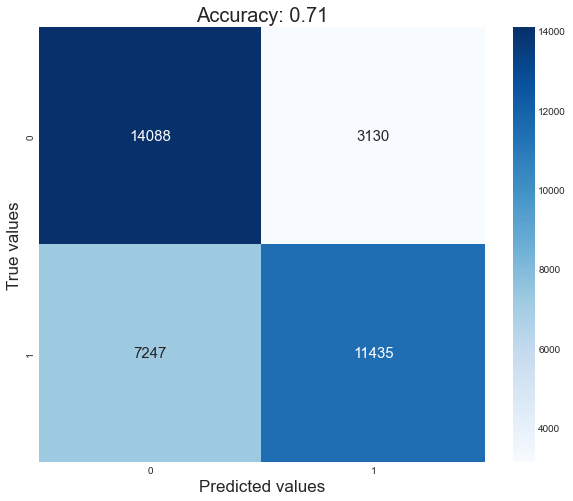

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
score = accuracy_score(y_test, y_pred)

plt.figure(figsize = (10, 8))
sns.heatmap(cm_df, annot=True, fmt = 'g', cmap='Blues', annot_kws={'size':15})
plt.title('Accuracy: %.2f'%score, fontsize=20)
plt.ylabel('True values', fontsize=17)
plt.xlabel('Predicted values', fontsize=17)
plt.show();

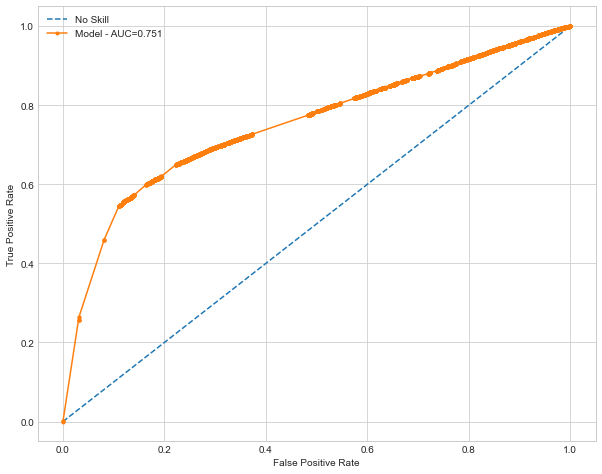

In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(x_test)[:,1]

# calculate roc curves
fpr, tpr, threshold = roc_curve(y_test, y_prob)

# calculate scores
model_auc = roc_auc_score(y_test, y_prob)

# plot the roc curve for the model
plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill' )
plt.plot(fpr, tpr, marker='.', label='Model - AUC=%.3f' %  (model_auc))

# show axis labels and the legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show(block=False)

The model has moderate F1 and accuracy, need improving to make better predictions

In [59]:
# picking threshold
threshold = []
accuracy = []

for p in np.arange(0,1,0.001):
	threshold.append(p) # create thresholds
	y_pred = (model.predict_proba(x_test)[:,1]>=p).astype(int)
	accuracy.append(accuracy_score(y_test, y_pred))
pos = np.argmax(accuracy)
print(threshold[pos], accuracy[pos])

0.538 0.7128969359331476


In [69]:
y_pred = (model.predict_proba(x_test)[:, 1] >= 0.538).astype(int)

In [70]:
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74     17218
           1       0.80      0.60      0.68     18682

    accuracy                           0.71     35900
   macro avg       0.73      0.72      0.71     35900
weighted avg       0.73      0.71      0.71     35900



Kêt quả sau khi tunning không hề tốt hơn nên sẽ giữ nguyên model đã train

In [72]:
# save model
import joblib
joblib.dump(model, "SentimentAnalysis_LR.pkl")

['SentimentAnalysis_LR.pkl']

In [74]:
# load model
clf = joblib.load('SentimentAnalysis_LR.pkl')